In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [36]:
weather = pd.read_csv('weather.csv')
print(weather.head(5))

                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13  

In [37]:
print(weather.dtypes)

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object


In [4]:
##RENAMING COLUMNS

In [5]:
weather = weather.rename(columns={'Formatted Date': 'Date', 'Summary': 'Summary', 'Precip Type': 'PrecipeType', 'Temperature (C)': 'Temperature','Apparent Temperature (C)': 'ApparentTemparature',
                                  'Humidity': 'Humidity', 'Wind Speed (km/h)': 'WindSpeed',"Wind Bearing (degrees)": 'WindBearing','Visibility (km)':'visibility','Loud Cover':'LoudCover',
                                  'Pressure (millibars)':'Pressure','Daily Summary':'DailySum'})

In [6]:

weather = weather.drop(['PrecipeType','Date','Summary','DailySum'],axis=1)
print(weather.dtypes)

Temperature            float64
ApparentTemparature    float64
Humidity               float64
WindSpeed              float64
WindBearing            float64
visibility             float64
LoudCover              float64
Pressure               float64
dtype: object


In [7]:
n_features = weather.select_dtypes(include=[np.number])

In [8]:
# Null values
nulls = pd.DataFrame(weather.isnull().sum().sort_values(ascending=False))
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print(nulls)

                     Null Count
Feature                        
Pressure                      0
LoudCover                     0
visibility                    0
WindBearing                   0
WindSpeed                     0
Humidity                      0
ApparentTemparature           0
Temperature                   0


In [9]:
##handling missing value
data = weather.select_dtypes(include=[np.number]).interpolate().dropna()
print('weather.count',weather.count())
print('The values without 0 sum',sum(data.isnull().sum() != 0))

weather.count Temperature            96453
ApparentTemparature    96453
Humidity               96453
WindSpeed              96453
WindBearing            96453
visibility             96453
LoudCover              96453
Pressure               96453
dtype: int64
The values without 0 sum 0


In [10]:
# Working with correlated features
corr = n_features.corr()
print('The top 3 correlated features \n')
print(corr['Temperature'].sort_values(ascending=False)[:3], '\n')

The top 3 correlated features 

Temperature            1.000000
ApparentTemparature    0.992629
visibility             0.392847
Name: Temperature, dtype: float64 



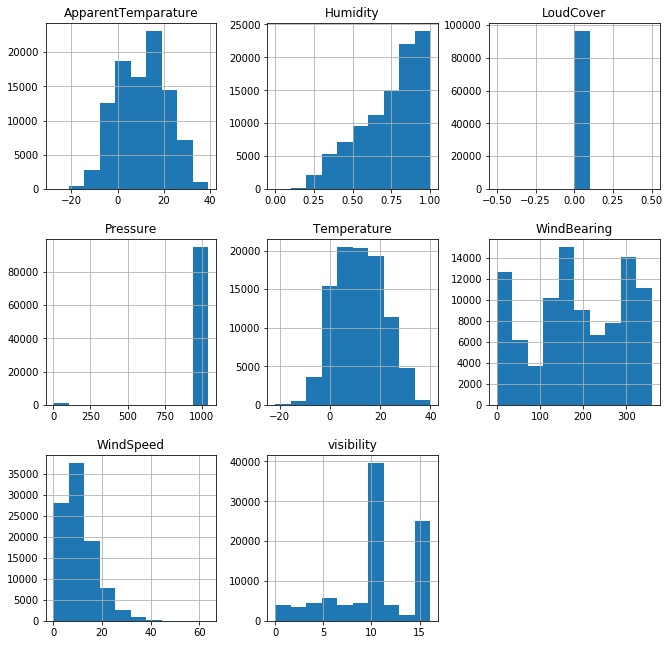

In [15]:
import matplotlib.pyplot as plt
weather[weather.dtypes[(weather.dtypes=="float64")|(weather.dtypes=="int64")]
                      .index.values].hist(figsize=[11,11])
plt.show();

In [24]:
y_data1 =  weather["ApparentTemparature"]
y_data2 = weather["WindSpeed"]
x_data = weather["Temperature"]

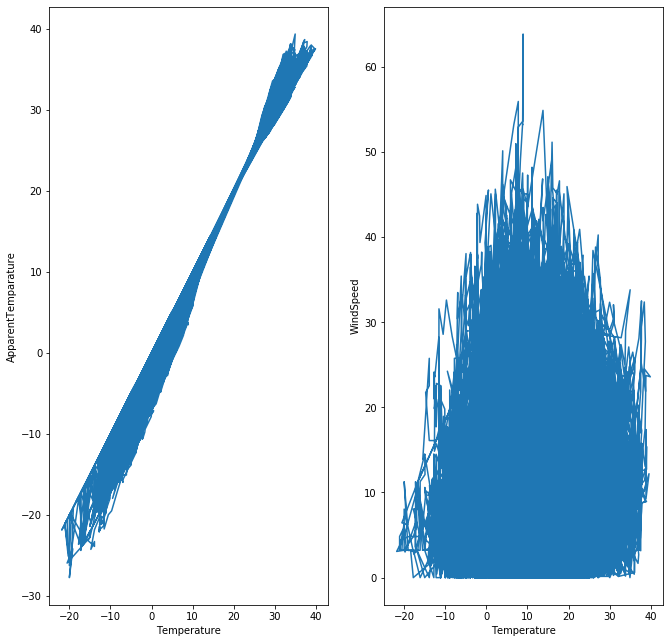

In [25]:
fig = plt.figure()
plt.rcParams['figure.figsize']=(11,11)

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.plot(x_data, y_data1, label='data 1')
ax2.plot(x_data, y_data2, label='data 2')
ax1.set_xlabel('Temperature')
ax1.set_ylabel('ApparentTemparature')
ax2.set_xlabel('Temperature')
ax2.set_ylabel('WindSpeed')

plt.show()

In [26]:
# Build a linear model
x_train = weather.drop("Temperature",axis=1)
y_train = weather["Temperature"]

In [27]:
x_train, x_test, y_train, y_test= train_test_split(x_train, y_train, test_size=0.3, random_state=0)

In [28]:
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)

In [29]:
# Evaluate the performance,R2 and RMSE
print("R^2 is: ", model.score(x_test, y_test))
predictions = model.predict(x_test)


R^2 is:  0.9901827262104322


In [30]:
print('RMSE is: ', mean_squared_error(y_test, predictions))

RMSE is:  0.8947291170863458


In [31]:
#Traning with correlated features
x_train = weather[["ApparentTemparature","visibility"]]
y_train = weather["Temperature"]

In [32]:
x_train, x_test, y_train, y_test= train_test_split(x_train, y_train, test_size=0.3, random_state=0)

In [33]:
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)

In [34]:
# Evaluate the performance,R2 and RMSE
print("R^2 is: ", model.score(x_test, y_test))
predictions = model.predict(x_test)


R^2 is:  0.9855786076842652


In [35]:
print('RMSE is: ', mean_squared_error(y_test, predictions))

RMSE is:  1.3143404055334567
